In [30]:
from pathlib import Path
from fastai.vision.all import *

In [31]:
taxa = []
with open("labels-one.txt") as file:
    taxa = [line.strip() for line in file.readlines()]
taxa

['Trametes versicolor',
 'Pleurotus ostreatus',
 'Schizophyllum commune',
 'Hypholoma fasciculare',
 'Galerina marginata',
 'Lycoperdon perlatum',
 'Ganoderma applanatum',
 'Phaeolus schweinitzii',
 'Coprinus comatus',
 'Trichaptum biforme',
 'Laetiporus sulphureus']

In [ ]:
from mo_ml import download
# I'm pretty sure there is a way better way to do this
download(taxa, 100, "mo.json")

In [10]:
path = Path('sample')
fnames = get_image_files(path)
def label_func(x):
    return x.parent.name

In [11]:
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=Resize(160))
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [12]:
print(datetime.now())
learn.fine_tune(10)
print(datetime.now())

2022-07-17 15:51:34.510519


epoch,train_loss,valid_loss,error_rate,time
0,3.970518,1.675003,0.500000,02:12


epoch,train_loss,valid_loss,error_rate,time
0,1.856213,1.258391,0.354396,03:37


2022-07-17 15:57:25.141172


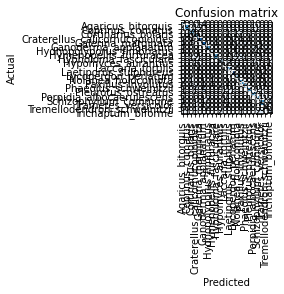

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

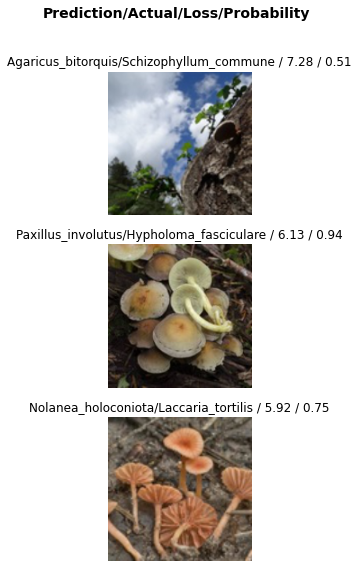

In [19]:
interp.plot_top_losses(3, nrows=3)

In [20]:
learn.save("sample-22-model")

Path('sample/models/sample-22-model.pth')

In [26]:
learn_22 = vision_learner(dls, resnet34, metrics=error_rate)
learn_22.load("sample-22-model")

In [27]:
interp_22 = ClassificationInterpretation.from_learner(learn_22)
interp_22.plot_top_losses(3, nrows=3)